In [2]:
import numpy as np
import os
import scipy
import pickle
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, plot_roc_curve
from imblearn.over_sampling import SMOTE

plt.style.use('seaborn')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
PATH = "MLSP/features"
MODEL_PATH = "MLSP/models/surfboard"
feature = 'log_melspec'

In [ ]:
# components = ['mfcc', 
#               'log_melspec',
#               'magnitude_spectrum',
#               'bark_spectrogram',
#               'morlet_cwt',
#               'chroma_stft',
#               'chroma_cqt',
#               'chroma_cens',
#               'spectral_slope',
#               'spectral_flux',
#               'spectral_entropy',
#               'spectral_centroid',
#               'spectral_spread',
#               'spectral_skewness',
#               'spectral_kurtosis',
#               'spectral_flatness',
#               'spectral_rolloff',
#               'loudness',
#               'loudness_slidingwindow',
#               'shannon_entropy',
#               'shannon_entropy_slidingwindow',
#               'zerocrossing',
#               'zerocrossing_slidingwindow',
#               'rms',
#               'intensity',
#               'crest_factor',
#               'f0_contour',
#               'f0_statistics',
#               'ppe',
#               'jitters',
#               'shimmers',
#               'hnr',
#               'dfa',
#               'lpc',
#               'lsf',
#               'formants',
#               'formants_slidingwindow',
#               'kurtosis_slidingwindow',
#               'log_energy',
#               'log_energy_slidingwindow']

In [ ]:
# names = ['spectral_slope',
#          'spectral_flux',
#          'spectral_entropy',
#          'spectral_centroid',
#          'spectral_spread',
#          'spectral_skewness',
#          'spectral_kurtosis',
#          'spectral_flatness',
#          'spectral_rolloff']

# train_x_all = []
# dev1_x_all = []
# dev2_x_all = []
# test_x_all = []

# for feature in names:
#     train_x = np.load(os.path.join(PATH, f'surfboard_feature/train_x_{feature}.npy'), allow_pickle=True)  
#     dev1_x = np.load(os.path.join(PATH, f'surfboard_feature/d1_x_{feature}.npy'), allow_pickle=True)    
#     dev2_x = np.load(os.path.join(PATH, f'surfboard_feature/d2_x_{feature}.npy'), allow_pickle=True)   
#     test_x = np.load(os.path.join(PATH, f'surfboard_feature/test_x_{feature}.npy'), allow_pickle=True)    
#     train_x_all.append(train_x)
#     dev1_x_all.append(dev1_x)
#     dev2_x_all.append(dev2_x)
#     test_x_all.append(test_x)

# train_y = np.load(os.path.join(PATH, f'opensmile/train_y.npy'), allow_pickle=True)
# dev1_y = np.load(os.path.join(PATH, f'opensmile/d1_y.npy'), allow_pickle=True)
# dev2_y = np.load(os.path.join(PATH, f'opensmile/d2_y.npy'), allow_pickle=True)
# test_y = np.load(os.path.join(PATH, f'opensmile/test_y.npy'), allow_pickle=True)

# train_x = np.concatenate(train_x_all, axis=-1)
# dev1_x = np.concatenate(dev1_x_all, axis=-1)
# dev2_x = np.concatenate(dev2_x_all, axis=-1)
# test_x = np.concatenate(test_x_all, axis=-1)

In [11]:
train_x = np.load(os.path.join(PATH, f'surfboard_feature/train_x_{feature}.npy'), allow_pickle=True)
train_y = np.load(os.path.join(PATH, f'opensmile/train_y.npy'), allow_pickle=True)
dev1_x = np.load(os.path.join(PATH, f'surfboard_feature/d1_x_{feature}.npy'), allow_pickle=True)
dev1_y = np.load(os.path.join(PATH, f'opensmile/d1_y.npy'), allow_pickle=True)
dev2_x = np.load(os.path.join(PATH, f'surfboard_feature/d2_x_{feature}.npy'), allow_pickle=True)
dev2_y = np.load(os.path.join(PATH, f'opensmile/d2_y.npy'), allow_pickle=True)
test_x = np.load(os.path.join(PATH, f'surfboard_feature/test_x_{feature}.npy'), allow_pickle=True)
test_y = np.load(os.path.join(PATH, f'opensmile/test_y.npy'), allow_pickle=True)

In [12]:
train_x = np.concatenate([train_x, dev1_x, dev2_x])
train_y = np.concatenate([train_y, dev1_y, dev2_y])

smote = SMOTE(random_state=0)
balance_x, balance_y = smote.fit_resample(train_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
print('train:', train_x.shape, train_y.shape)
print('test:', test_x.shape, test_y.shape)
print('balance:', balance_x.shape, balance_y.shape)

train: (10860, 3328) (10860,)
test: (3000, 3328) (3000,)
balance: (15480, 3328) (15480,)


In [14]:
scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(train_x)
balance_x = scaler.transform(balance_x)
test_x = scaler.transform(test_x)

In [ ]:
# pca = PCA(n_components=30)
# pca.fit(train_x)
# train_x = pca.transform(train_x)
# balance_x = pca.transform(balance_x)
# test_x = pca.transform(test_x)

In [ ]:
# ica = FastICA(n_components=30)
# ica.fit(train_x)
# train_x = ica.transform(train_x)
# balance_x = ica.transform(balance_x)
# test_x = ica.transform(test_x)

In [ ]:
class ALCModel:
    def __init__(self, method, **kwarg):
        self.method = method
        
        if method == 'logistic':
            # https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
            self.clf = LogisticRegression(**kwarg)
        elif method == 'neighbor':
            # https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
            self.clf = KNeighborsClassifier(**kwarg)
        elif method == 'linear_svm':
            # https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html
            self.clf = LinearSVC(**kwarg)
        elif method == 'svm':
            # https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
            self.clf = SVC(**kwarg)
        elif method == 'forest':
            # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
            self.clf = RandomForestClassifier(**kwarg)
        elif method == 'adaboost':
            # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
            self.clf = AdaBoostClassifier(**kwarg)
        elif method == 'gradboost':
            # https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
            self.clf = GradientBoostingClassifier(**kwarg)
        else:
            raise NotImplementedError
        
    def fit(self, x, y):
        self.clf.fit(x, y)
    
    def predict(self, x):
        prediction = self.clf.predict(x)
        return prediction
    
    def evaluate(self, x, label, roc=True):
        pred = self.predict(x)
        acc = np.mean(pred == label)
        report = sklearn.metrics.classification_report(label, pred)
        if roc:
            curve = plot_roc_curve(self.clf, x, label)
            plt.show()
        return acc, report

    def save_model(self, path):
        if not os.path.exists(path):
            os.mkdir(path)        
        filename = os.path.join(path, '{}.pkl'.format(self.method))
        pickle.dump(self.clf, open(filename, "wb"))

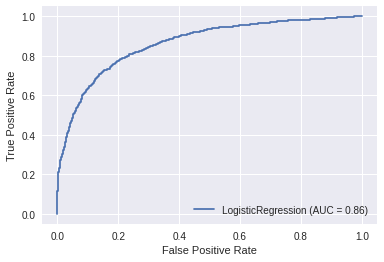

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      1500
           1       0.84      0.70      0.76      1500

    accuracy                           0.78      3000
   macro avg       0.79      0.78      0.78      3000
weighted avg       0.79      0.78      0.78      3000



In [ ]:
model = ALCModel('logistic', penalty='l2', C=1.0, n_jobs=8)
model.fit(balance_x, balance_y)
acc, report = model.evaluate(test_x, test_y, roc=True)
print(report)
# model.save_model(MODEL_PATH)

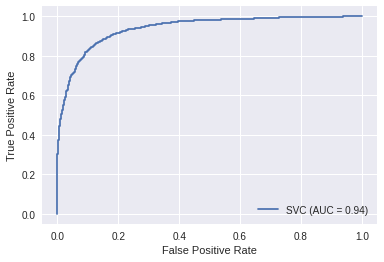

              precision    recall  f1-score   support

           0       0.74      0.96      0.84      1500
           1       0.95      0.66      0.78      1500

    accuracy                           0.81      3000
   macro avg       0.84      0.81      0.81      3000
weighted avg       0.84      0.81      0.81      3000



In [ ]:
model = ALCModel('svm', C=10.0, kernel='rbf')
model.fit(balance_x, balance_y)
acc, report = model.evaluate(test_x, test_y, roc=True)
print(report)
# model.save_model(MODEL_PATH)

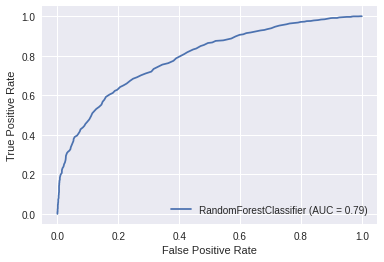

              precision    recall  f1-score   support

           0       0.64      0.89      0.75      1500
           1       0.82      0.51      0.63      1500

    accuracy                           0.70      3000
   macro avg       0.73      0.70      0.69      3000
weighted avg       0.73      0.70      0.69      3000



In [ ]:
model = ALCModel('forest', n_estimators=200, n_jobs=8)
model.fit(balance_x, balance_y)
acc, report = model.evaluate(test_x, test_y, roc=True)
print(report)
# model.save_model(MODEL_PATH)

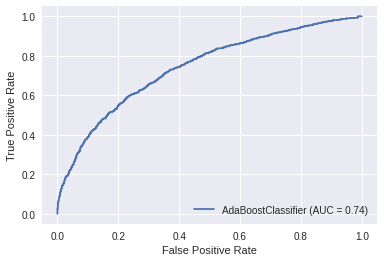

              precision    recall  f1-score   support

           0       0.67      0.70      0.68      1500
           1       0.69      0.65      0.67      1500

    accuracy                           0.68      3000
   macro avg       0.68      0.68      0.68      3000
weighted avg       0.68      0.68      0.68      3000



In [ ]:
model = ALCModel('adaboost', n_estimators=100, learning_rate=1.0)
model.fit(balance_x, balance_y)
acc, report = model.evaluate(test_x, test_y, roc=True)
print(report)
# model.save_model(MODEL_PATH)

      Iter       Train Loss   Remaining Time 
         1           1.3611           11.69m
         2           1.3395           11.61m
         3           1.3199           11.60m
         4           1.3027           11.57m
         5           1.2872           11.56m
         6           1.2712           11.50m
         7           1.2591           11.43m
         8           1.2464           11.34m
         9           1.2354           11.27m
        10           1.2257           11.21m
        20           1.1367           10.55m
        30           1.0738            9.97m
        40           1.0199            9.38m
        50           0.9683            8.80m
        60           0.9262            8.22m
        70           0.8904            7.63m
        80           0.8611            7.05m
        90           0.8280            6.50m
       100           0.8015            5.91m
       200           0.6017            0.00s


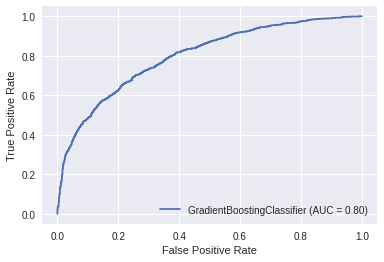

              precision    recall  f1-score   support

           0       0.69      0.78      0.74      1500
           1       0.75      0.66      0.70      1500

    accuracy                           0.72      3000
   macro avg       0.72      0.72      0.72      3000
weighted avg       0.72      0.72      0.72      3000



In [ ]:
model = ALCModel('gradboost', n_estimators=200, learning_rate=0.1, verbose=True)
model.fit(balance_x, balance_y)
acc, report = model.evaluate(test_x, test_y, roc=True)
print(report)
model.save_model(MODEL_PATH)